In [ ]:
# from fastai import *
# from fastbook import *
from fastai.vision.all import *
import os
import gdown

## Download Dataset

In [ ]:
WORKDIR = Path('.')
DATASET_ROOT = Path('ip102_v1.1')
CLASSES_FILE = Path('classes.txt')
TARFILE_PATH = Path('ip102_v1.1.tar')
TEST_FILE = DATASET_ROOT/'test.txt'
TRAIN_FILE = DATASET_ROOT/'train.txt'
VAL_FILE = DATASET_ROOT/'val.txt'
IMAGES_PATH = DATASET_ROOT/'images'

In [ ]:
files = [('1Xa3p1h8jkk7ECHzSuGYrn-d39QOd0ezj', f'{CLASSES_FILE}'),
         ('1EL9TA-J5XsiBR4M3nQkMR_e-2dP48eQN', f'{TARFILE_PATH}')]
[gdown.download(id=id, output=fname, quiet=True) for id, fname in files]

['classes.txt', 'ip102_v1.1.tar']

In [ ]:
untar_dir(TARFILE_PATH, WORKDIR)

Path('ip102_v1.1')

## Files Reading and stuff

In [ ]:
# reads the classes.txt file and returns a list of tuple(id, class_name)
def classes_set():
  with open(CLASSES_FILE, 'r') as fd:
    classes = map(lambda line: line.split(maxsplit=1), fd)
    classes = map(lambda pair: (int(pair[0]), pair[1].strip(' \t\n')), classes)
    classes = list(classes)
  return classes

In [ ]:
# reads the file appointed in path FILE and returns a list of tuple(image_name, id)
def get_label_file_data(FILE):
  with open(FILE, 'r') as fd:
    data = map(lambda line: line.split(), fd)
    data = map(lambda pair: (pair[0], int(pair[1].replace('\n', ''))), data)
    data = list(data)
  return data

In [ ]:
classes = classes_set()
df_classes = pd.DataFrame(data={
    'id': [i[0] for i in classes],
    'label': [i[1] for i in classes]
})

In [ ]:
train_pairs = get_label_file_data(TRAIN_FILE)
df_train = pd.DataFrame(data={
    'image': [i[0] for i in train_pairs],
    'id': [i[1] for i in train_pairs],
    'is_valid': 0
})

In [ ]:
val_pairs = get_label_file_data(VAL_FILE)
df_val = pd.DataFrame(data={
    'image': [i[0] for i in val_pairs],
    'id': [i[1] for i in val_pairs],
    'is_valid': 1
})

In [ ]:
df_classes

In [ ]:
df_train

In [ ]:
df_val

,image,id,is_valid
0,00009.jpg,0,True
1,00012.jpg,0,True
2,00014.jpg,0,True
3,00034.jpg,0,True
4,00035.jpg,0,True
...,...,...,...
7503,75187.jpg,101,True
7504,75191.jpg,101,True
7505,75202.jpg,101,True
7506,75206.jpg,101,True


In [ ]:
df = pd.concat((df_train, df_val))

In [ ]:
df = df_classes.merge(df, how='inner', on='id')

In [ ]:
df

,id,label,image,is_valid
0,1,rice leaf roller,01115.jpg,0
1,1,rice leaf roller,01116.jpg,0
2,1,rice leaf roller,01121.jpg,0
3,1,rice leaf roller,01122.jpg,0
4,1,rice leaf roller,01125.jpg,0
...,...,...,...,...
51818,101,Sternochetus frigidus,75187.jpg,1
51819,101,Sternochetus frigidus,75191.jpg,1
51820,101,Sternochetus frigidus,75202.jpg,1
51821,101,Sternochetus frigidus,75206.jpg,1


In [ ]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=ColSplitter(),
                   get_x=ColReader('image', pref=IMAGES_PATH),
                   get_y=ColReader('label'),
                   item_tfms=Resize(224))

In [ ]:
ds = dblock.datasets(df)

In [ ]:
dl = dblock.dataloaders(df)

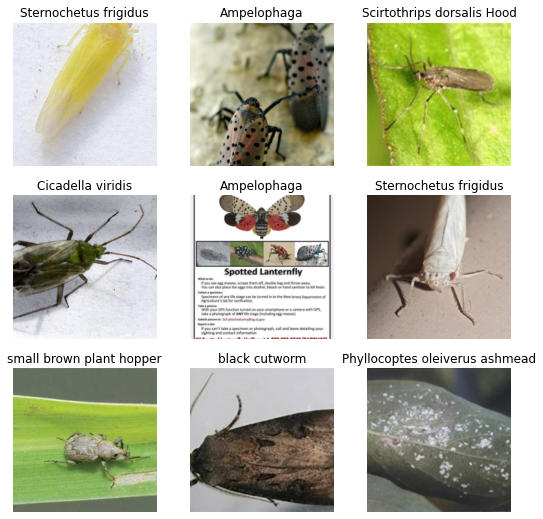

In [ ]:
dl.show_batch()

In [ ]:
def get_label(filename):
    return labels[filename]

In [ ]:
labels = dict()

files = [DATASET_ROOT/'train.txt', DATASET_ROOT/'val.txt', DATASET_ROOT/'test.txt']
for fl in files:
    with open(fl, 'r') as f:
        line = f.readline()
        while line != '':
            line = line.split(' ')
            labels[line[0]] = int(line[1])
            line = f.readline()

fnames = [Path(os.path.join(str(DATASET_ROOT), 'images', i)) for i in os.listdir(f'{DATASET_ROOT}/images')]

classes = dict()
with open(f'classes.txt', 'r') as f:
    line = f.readline()
    while line != '':
        line = line.split(' ', )
        # print(line[1:])
        classes[int(line[0]) - 1] = ' '.join(line[1:]).strip()
        line = f.readline()


# labels
len(labels)
# fnames
# classes

75222

In [ ]:
dls = ImageDataLoaders.from_name_func(
    'models/',
    fnames=fnames,
    label_func=get_label,
    item_tfms=Resize(224),
    valid_pct=0.2
    )

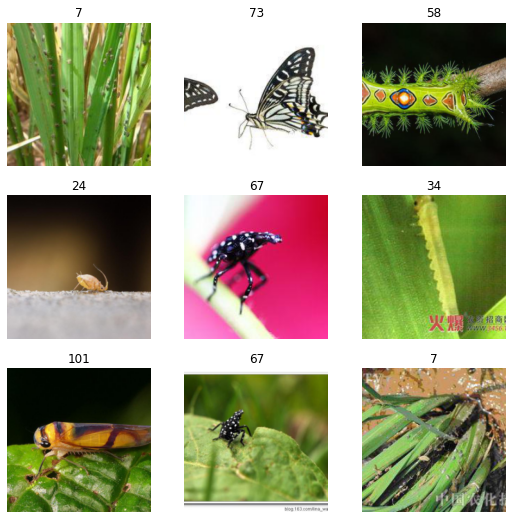

In [ ]:
dls.show_batch()